<h1 style=text-align:center> REGRESSION TREE(DECISION TREE)</h1>

A Decision tree is a machine learning algorithm that can be used for both classification and regression ( In that case , It would be called Regression Trees )

In [2]:
link = '../../DATASET/Life Expectancy Data.csv'

In [3]:
import pandas as pd 
dataset = pd.read_csv(link)

In [4]:
dataset.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
dataset.drop(['Country','Year','Status'],axis=1, inplace=True)

In [6]:
dataset.describe()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


<h1>MENGECEK NILAI NULL PADA DATA</h1>

In [43]:
for col in dataset.columns :
    print(col, dataset[col].isna().sum())

Life expectancy  0
Adult Mortality 0
infant deaths 0
Alcohol 0
percentage expenditure 0
Hepatitis B 0
Measles  0
 BMI  0
under-five deaths  0
Polio 0
Total expenditure 0
Diphtheria  0
 HIV/AIDS 0
GDP 0
Population 0
 thinness  1-19 years 0
 thinness 5-9 years 0
Income composition of resources 0
Schooling 0


In [10]:
print(dataset['Population'])

0       33736494.0
1         327582.0
2       31731688.0
3        3696958.0
4        2978599.0
           ...    
2933    12777511.0
2934    12633897.0
2935      125525.0
2936    12366165.0
2937    12222251.0
Name: Population, Length: 2938, dtype: float64


In [12]:
dataset.shape

(1649, 19)

In [9]:
dataset.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

<h1>MENGHILANGKAN NILAI NULL</h1>

In [41]:
dataset.dropna(inplace=True)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


<h1>MENGISI NULL DENGAN NILAI RATA RATA</h1>

In [13]:
import numpy as np

In [24]:
jumlah_data = np.shape(dataset)[0]
print(jumlah_data)

2938


In [27]:
print(dataset['Schooling'])

0       10.1
1       10.0
2        9.9
3        9.8
4        9.5
        ... 
2933     9.2
2934     9.5
2935    10.0
2936     9.8
2937     9.8
Name: Schooling, Length: 2938, dtype: float64


In [40]:
# for kolom in dataset.columns :
#     perc_null = (dataset[kolom].isna().sum() * 100.0) / jumlah_data  
#     print(perc_null)
#     if perc_null <= 5.0 :
#         dataset[kolom].dropna()
#     else :
#         dataset[kolom] = dataset[kolom].fillna(dataset[kolom].mean())

# for col in dataset.columns :
    
#     dataset.fillna(dataset[col])

0.34036759700476515
0.34036759700476515
0.0
0.0
0.0
0.0
0.0
1.1572498298162015
0.0
0.6466984343090538
0.0
0.6466984343090538
0.0
0.0
0.0
1.1572498298162015
1.1572498298162015
0.0
0.0


<h1>MENGECEK OUTLIER DENGAN MELIHAT BOXPLOT</h1>

In [47]:
import matplotlib.pyplot as plt

In [49]:
import seaborn as sns

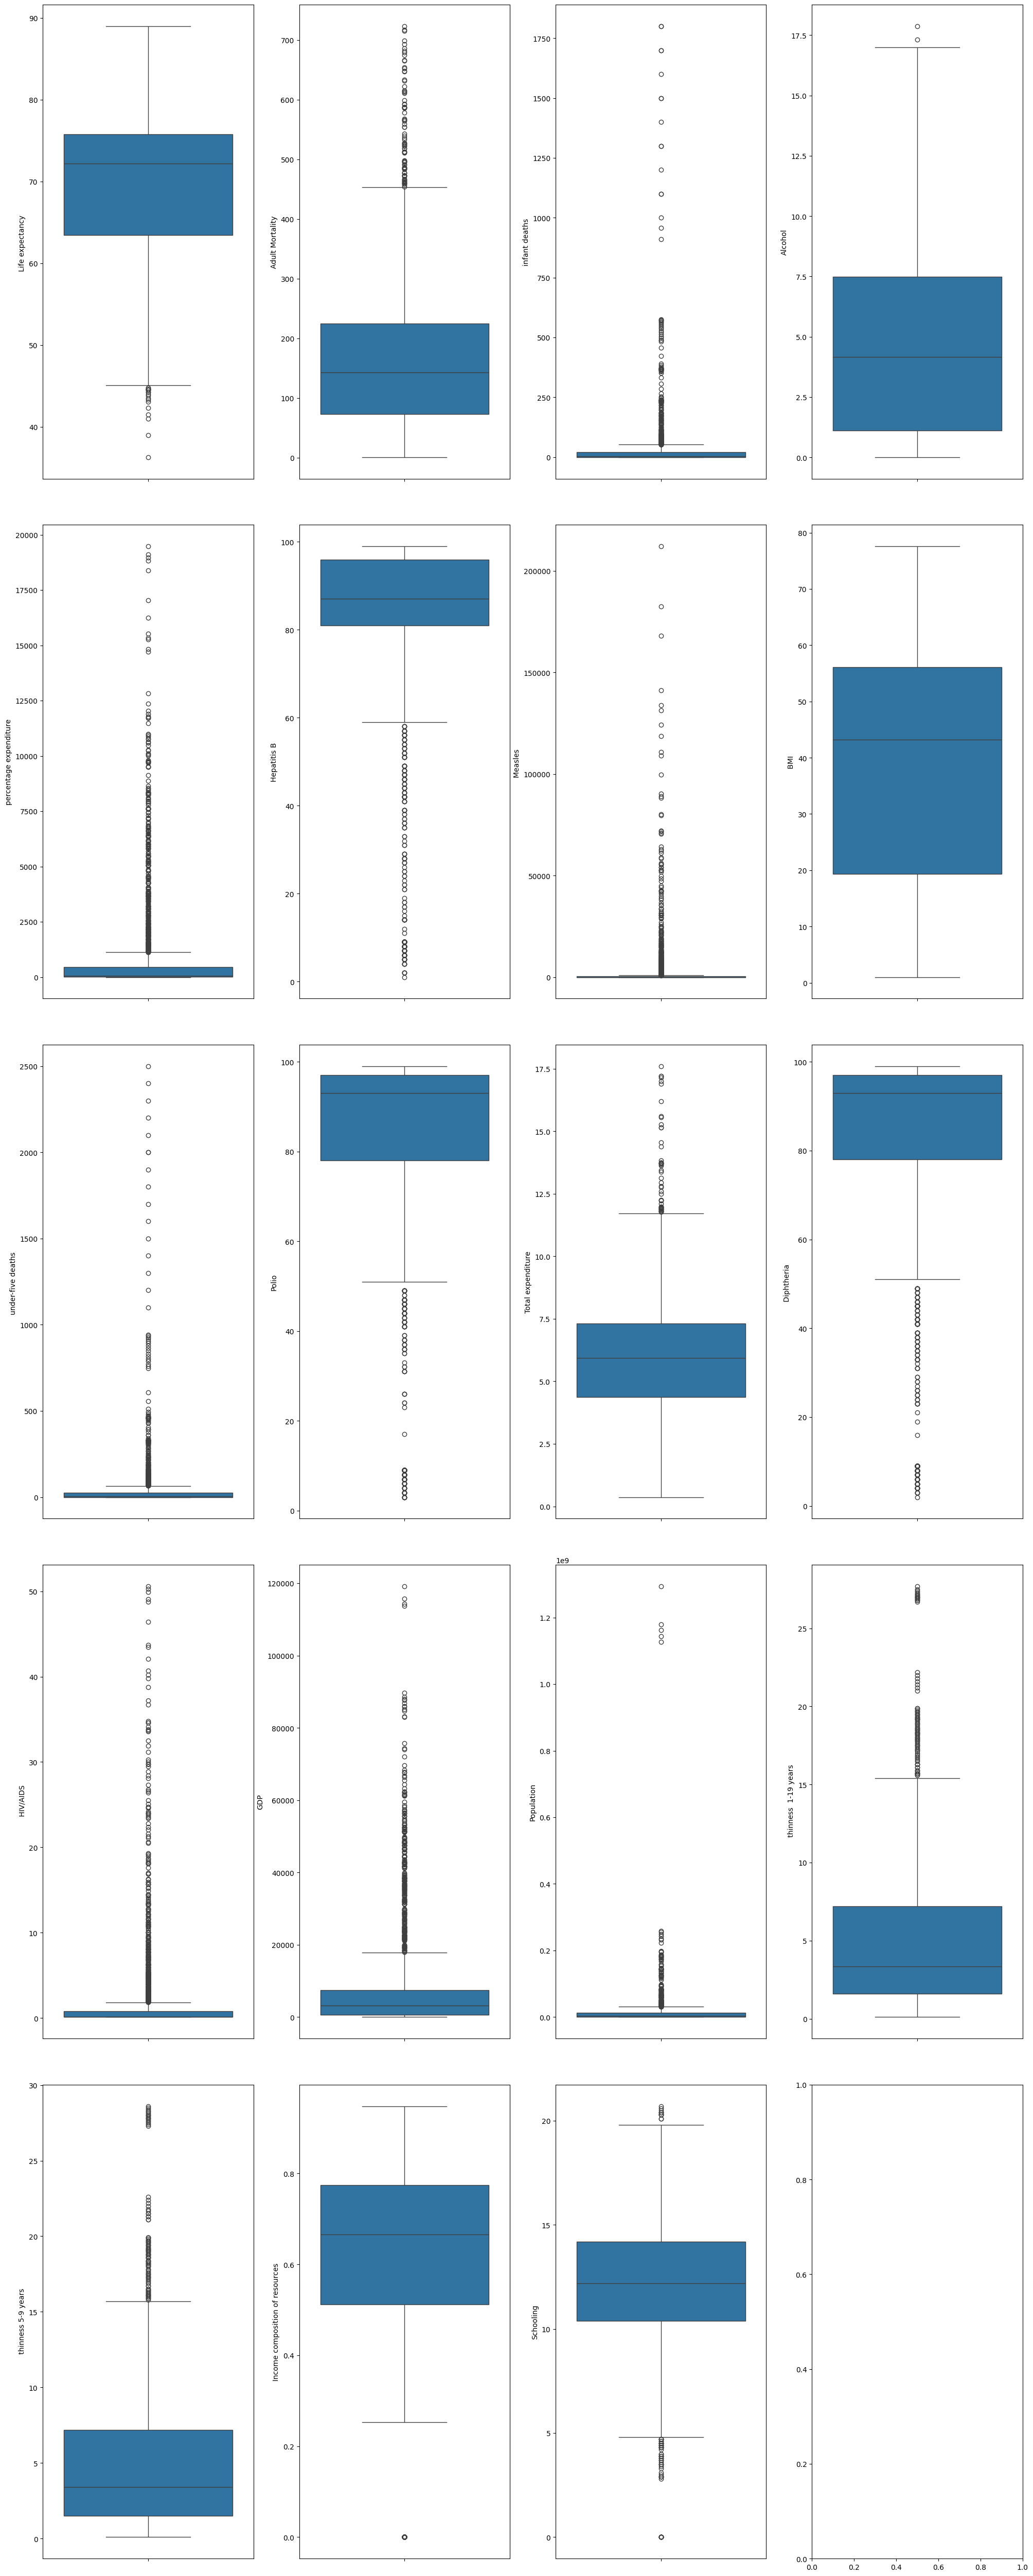

In [50]:
fig, axs = plt.subplots(ncols=4, nrows=5, figsize=(20, 50))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.boxplot(y=k, data=dataset, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [51]:
dataset.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

kolom infant deaths,percentage expenditure ,Measles, under-five deaths, HIV, dan GDP terlihat memiliki outlier, mari kita cek presentase outliernya.

In [16]:
import numpy as np

<h1>MELIHAT PPRESENTASE OUTLIER DENGAN TEKNIK IQR</h1>

In [53]:
for kolom, data in dataset.items() :
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    irq = q3 - q1
    data_per_col = data[(data <= q1 - 1.5 * irq) | (data >= q3 + 1.5 * irq)]
    perc = np.shape(data_per_col)[0] * 100.0 / np.shape(dataset)[0]   
    print("Column %s outliers = %.2f%%" % (kolom, perc))

 

Column Life expectancy  outliers = 0.66%
Column Adult Mortality outliers = 3.05%
Column infant deaths outliers = 11.39%
Column Alcohol outliers = 0.07%
Column percentage expenditure outliers = 13.05%
Column Hepatitis B outliers = 10.77%
Column Measles  outliers = 18.56%
Column  BMI  outliers = 0.00%
Column under-five deaths  outliers = 13.92%
Column Polio outliers = 9.45%
Column Total expenditure outliers = 1.70%
Column Diphtheria  outliers = 10.11%
Column  HIV/AIDS outliers = 18.21%
Column GDP outliers = 10.39%
Column Population outliers = 6.51%
Column  thinness  1-19 years outliers = 3.08%
Column  thinness 5-9 years outliers = 3.32%
Column Income composition of resources outliers = 3.95%
Column Schooling outliers = 2.15%


for kolom, data in dataset.items() :<br>
artinya dia akan melakukan perulangan tapi nggak satu-satu, jad misalnya dia bakal ngeprint kolom dan data di sini itu DATA SEMUANYA KOLOM TERSEBUT BREK JADI SATU <br> GTUU, JADI KALO DI PRINT MUNCULNYA SEMUA DATA UNTUK KOLOM TERSEBUT, tidak seperti logika biasanya

<h1>MARI KITA LIAT DISTRIBUSI MASING-MASING KOLOM</h1>

C:\Users\Dell\AppData\Local\Temp\ipykernel_2924\1385476777.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\Dell\AppData\Local\Temp\ipykernel_2924\1385476777.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\Dell\AppData\Local\Temp\ipyke

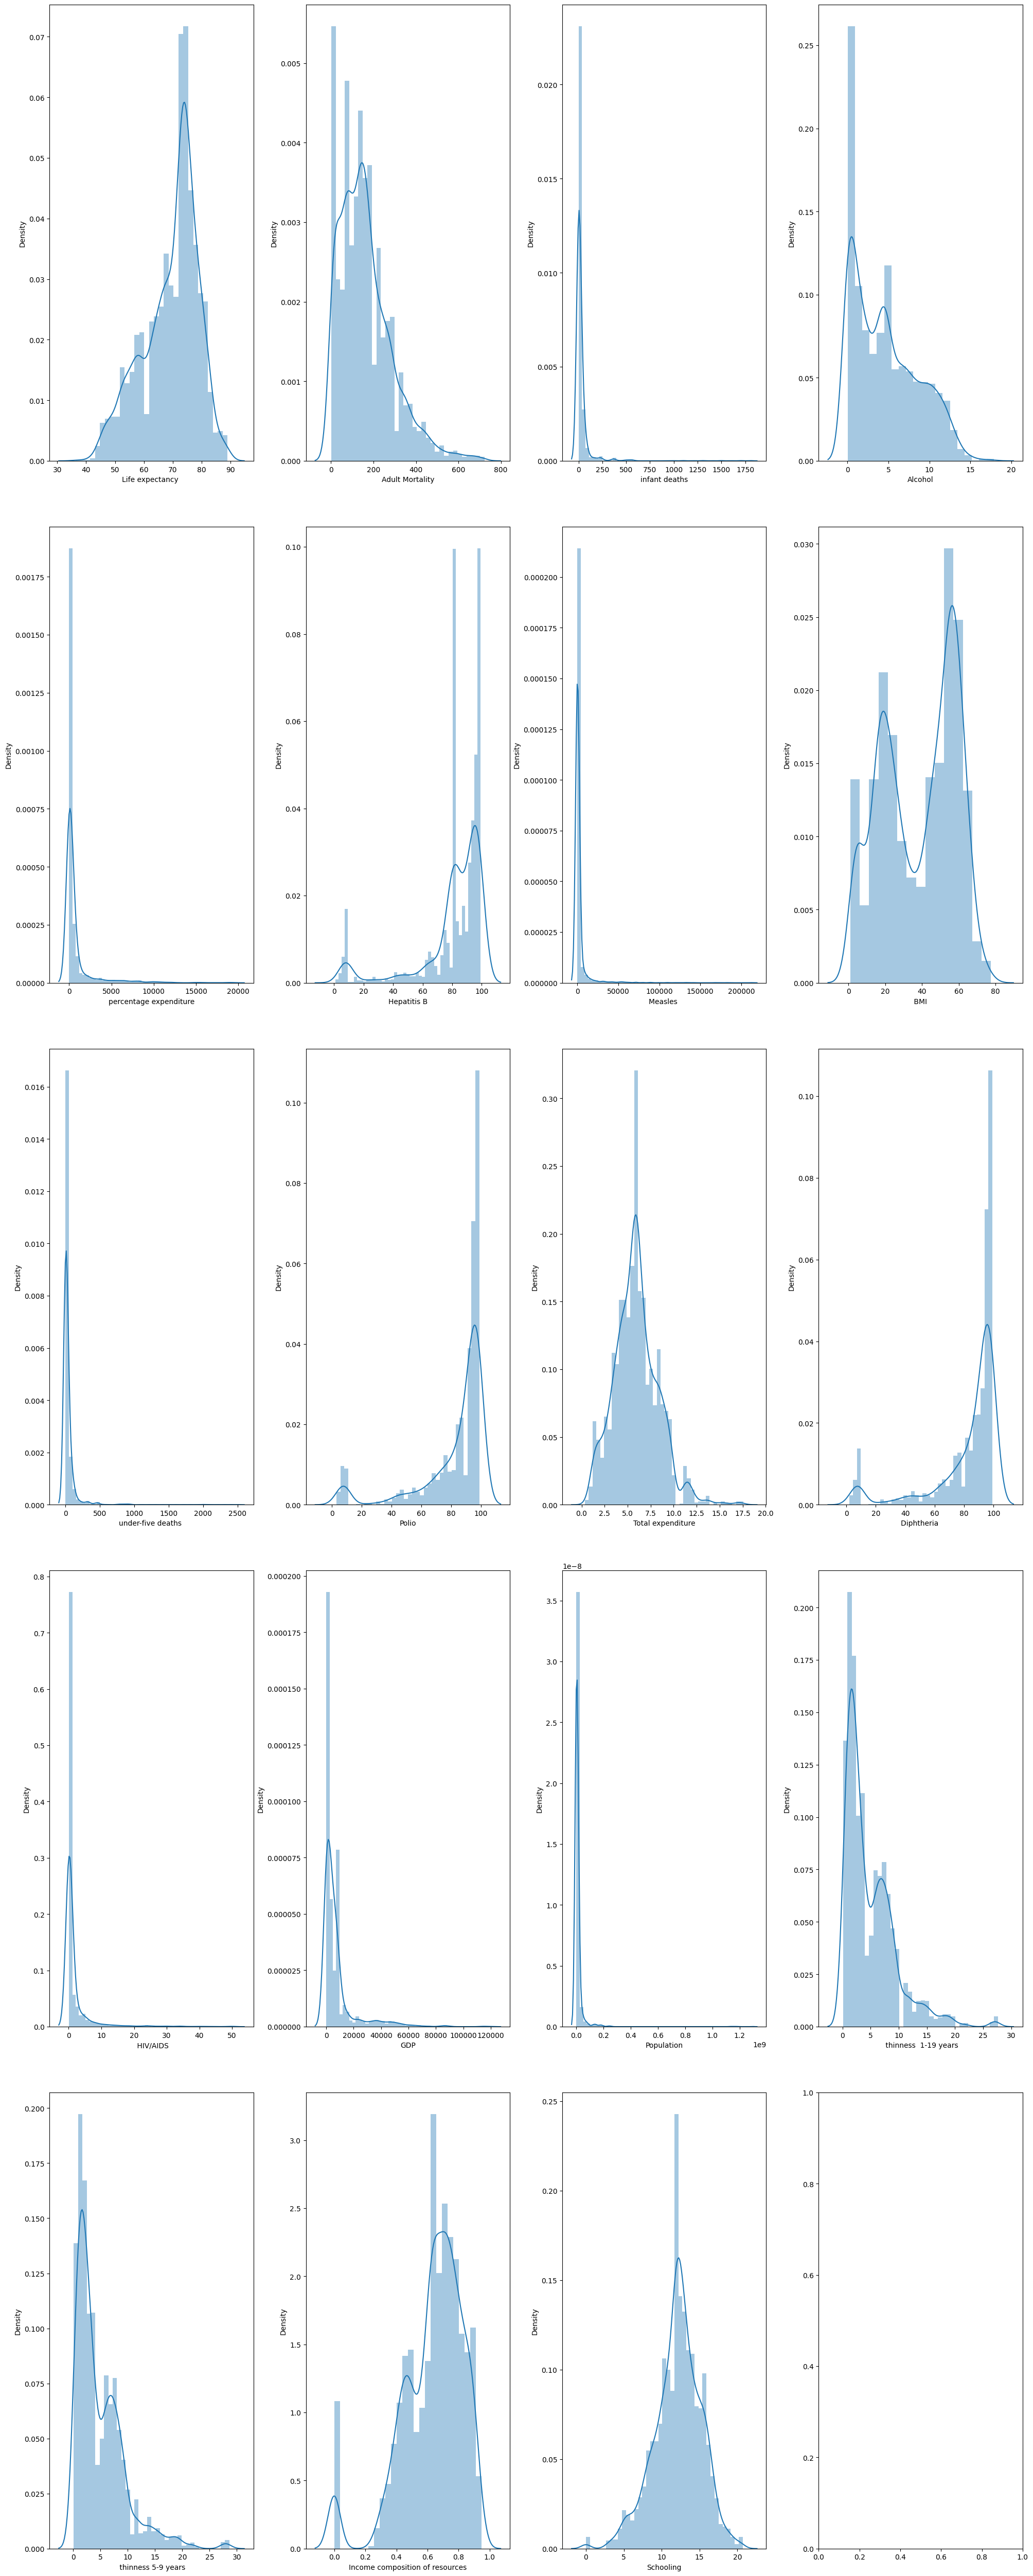

In [54]:
fig, axs = plt.subplots(ncols=4, nrows=5, figsize=(20, 50))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<h1>MELIHAT HUBUNGAN ANTARA KOLOM DENGAN KORELASI SPEARMAN</h1>

<Axes: >

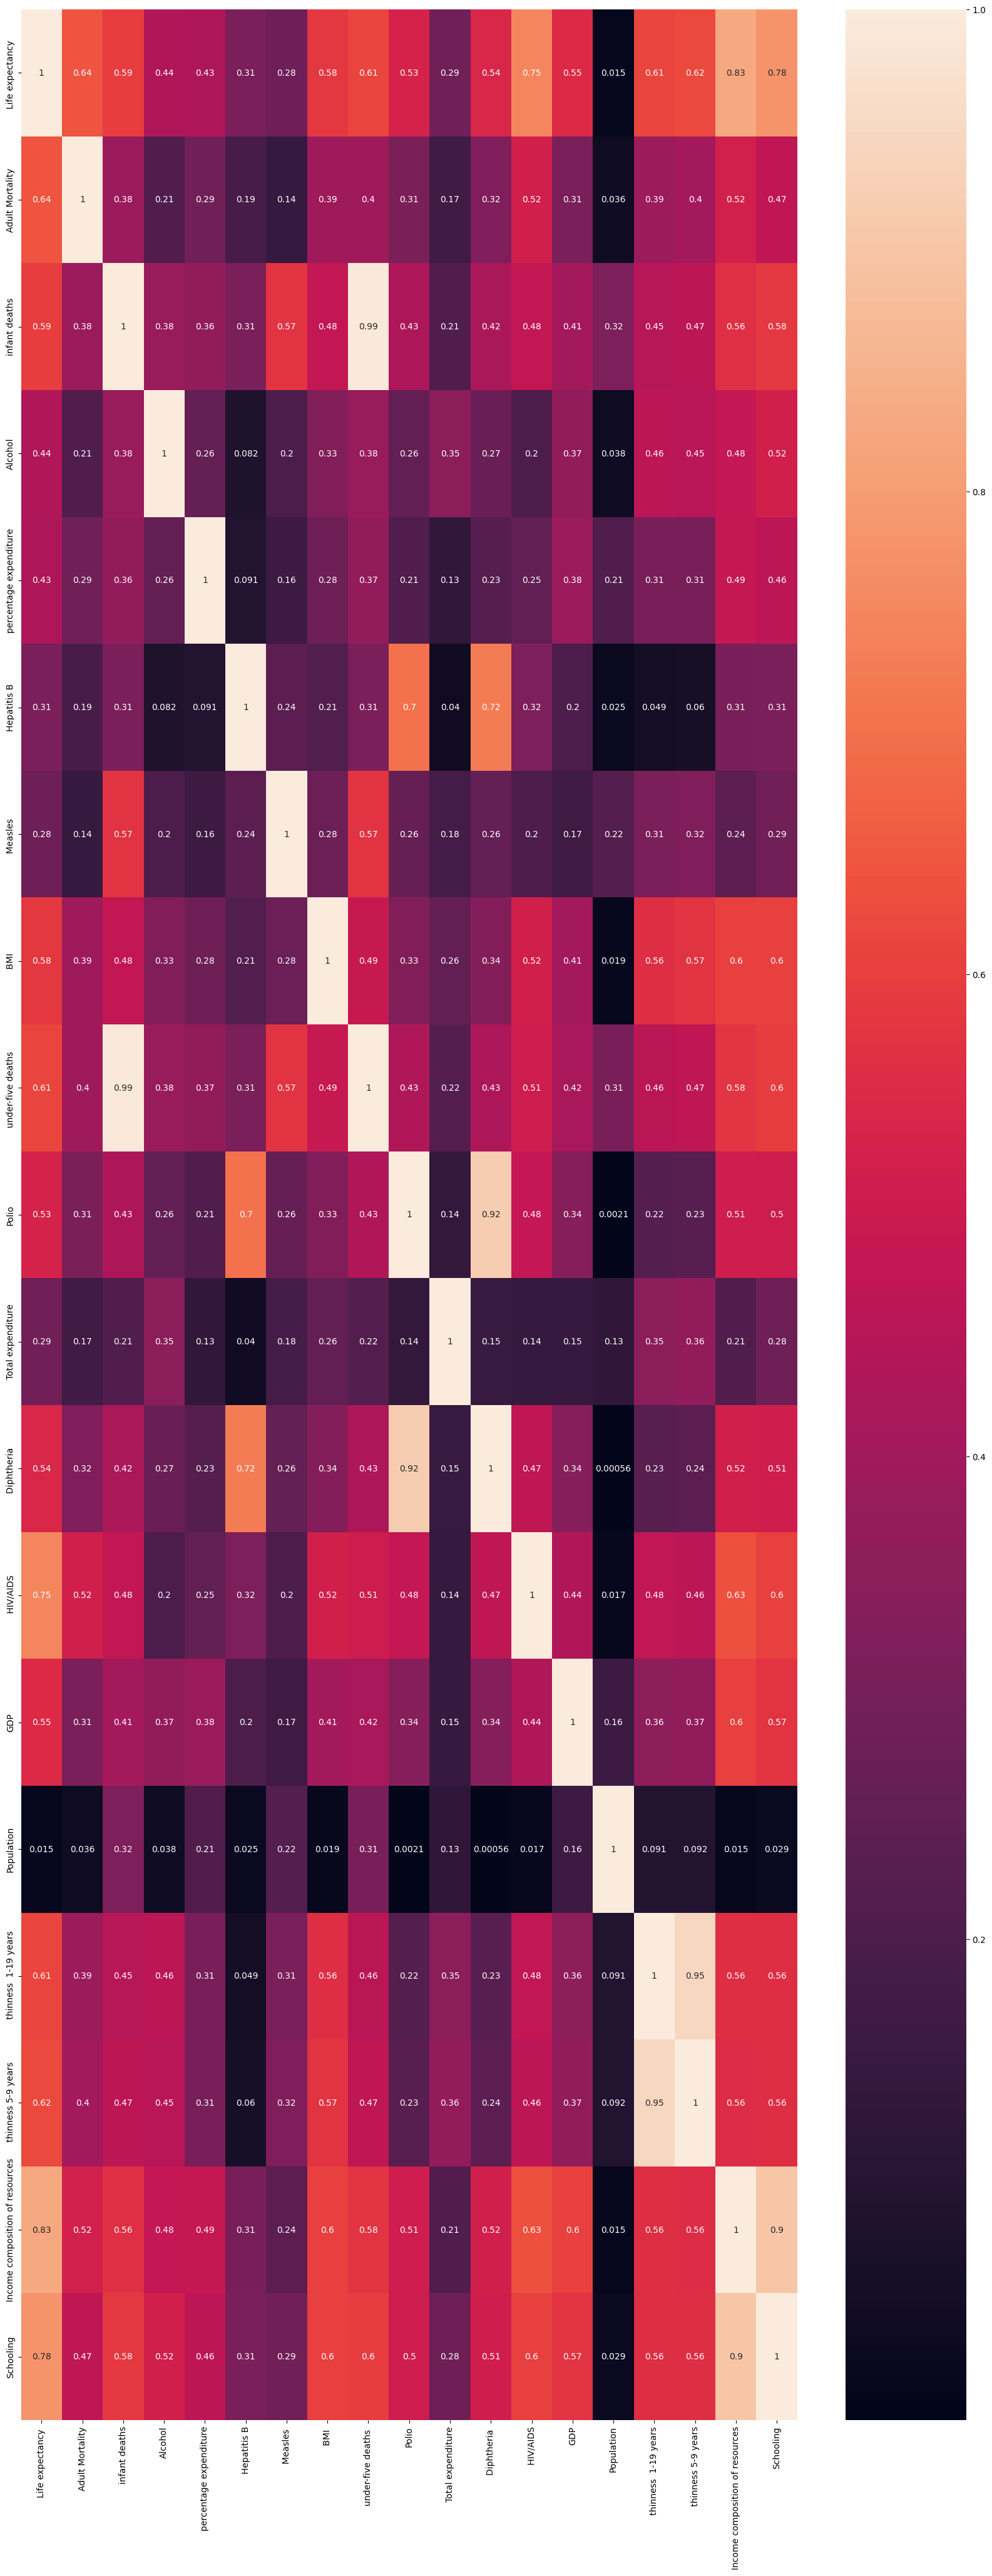

In [55]:
plt.figure(figsize=(20, 50))
sns.heatmap(dataset.corr(method='spearman').abs(),  annot=True)

In [55]:
dataset.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

<h1>MELIHAT PLOT REGRESI MASING-MASING KOLOM YANG DIPILIH TERHADAP KOLOM  'LIFE EXPETANCY'</h1>

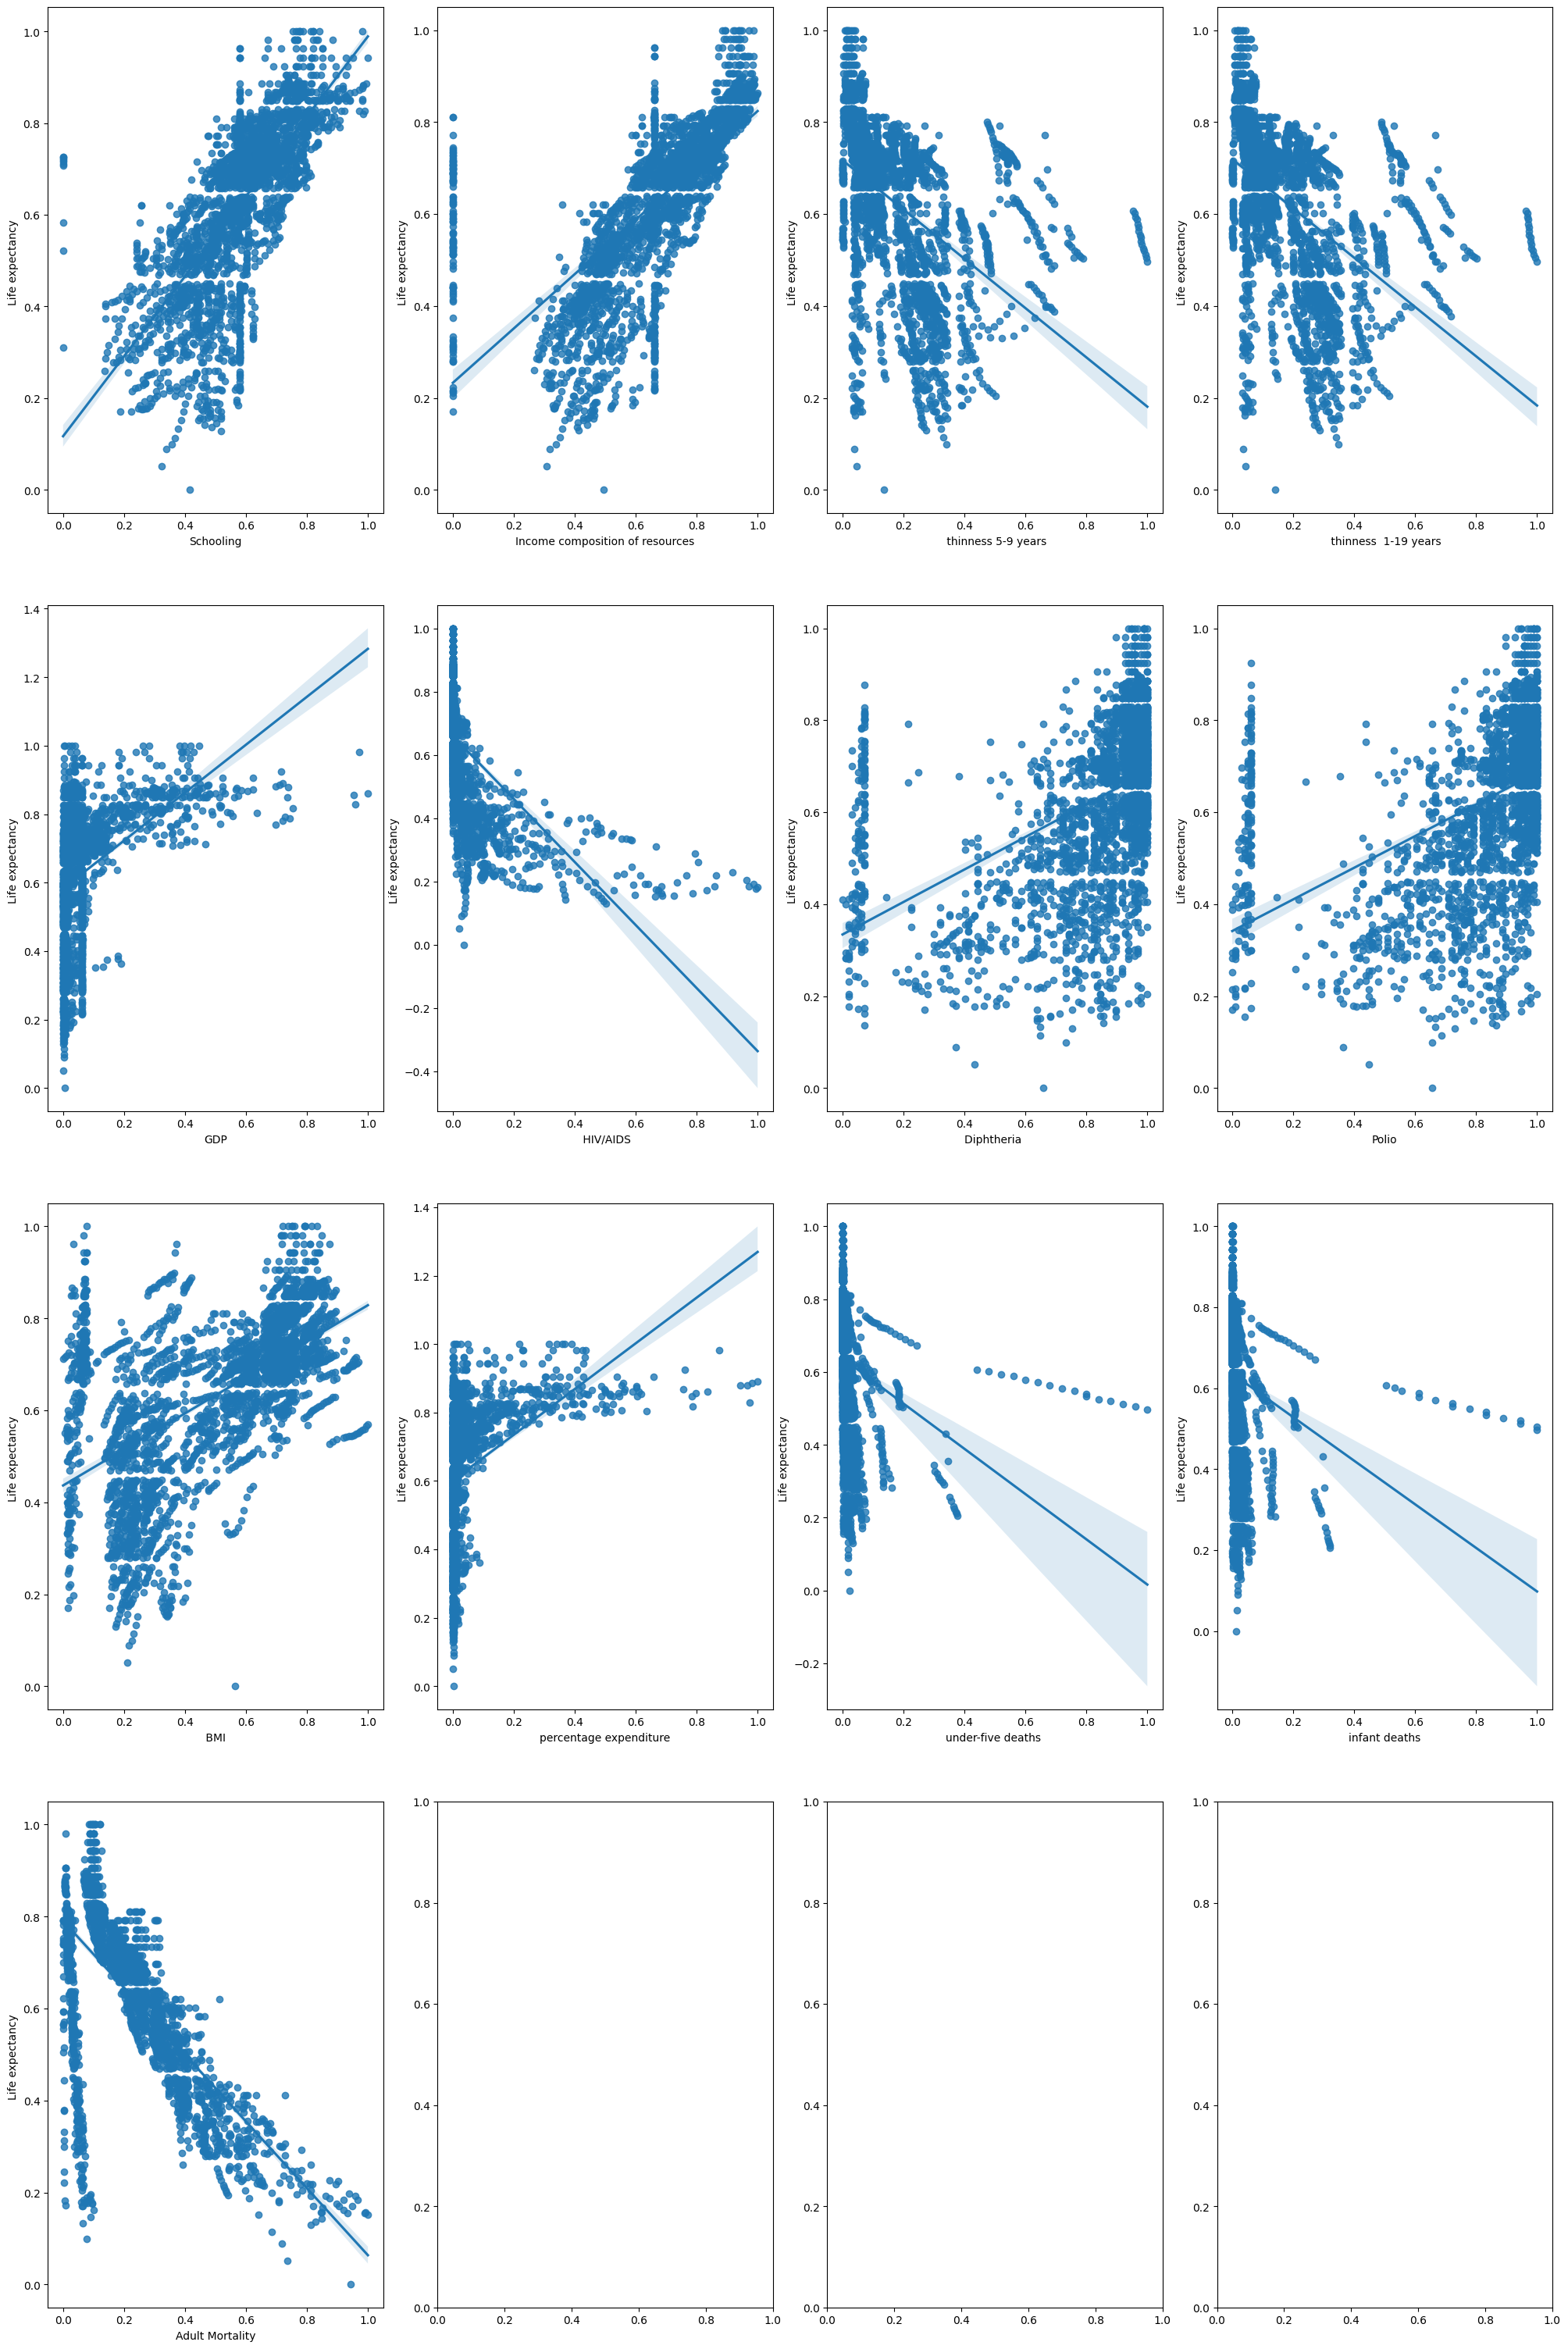

In [58]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler_target= preprocessing.MinMaxScaler()
column_sels = ['Schooling', 'Income composition of resources', ' thinness 5-9 years', ' thinness  1-19 years', 'GDP', ' HIV/AIDS','Diphtheria ','Polio', ' BMI ', 'percentage expenditure','under-five deaths ','infant deaths','Adult Mortality']
x = dataset.loc[:,column_sels]
y = dataset['Life expectancy ']
y_df = pd.DataFrame(y,columns=(['Life expectancy ']))
y_scale = min_max_scaler_target.fit_transform(y_df)
x_scale = min_max_scaler.fit_transform(x)
x_scaled = pd.DataFrame(data=x_scale, columns=column_sels)
y_scaled = pd.DataFrame(data=y_scale, columns=(['Life expectancy ']))
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(20, 30))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y_scaled, x=x_scaled[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [59]:
y_scaled.head()

,Life expectancy
0,0.544592
1,0.447818
2,0.447818
3,0.440228
4,0.434535


In [61]:
from scipy import stats

In [66]:
y_scaled =  np.log1p(y_scaled)
for col in x_scaled.columns:
    if np.abs(x_scaled[col].skew()) > 0.3:
        # x_scaled[col] = np.log1p(x_scaled[col])
        data_shifted = x_scaled[col] + abs(x_scaled[col].min()) + 1
        x_scaled[col],_ = stats.boxcox(data_shifted)

In [67]:
print(y_scaled.skew())

Life expectancy    -1.249074
dtype: float64


In [68]:
for col in x_scaled.columns :
    print(x_scaled[col].skew())

0.01577388773964307
-0.11967755195689288
0.21311726040619625
0.2203104804962183
0.6218088278685717
1.390560493916187
-0.7324984029527265
-0.7235887660057156
-0.2283977010333814
1.2224182824501004
1.2336478296649773
1.2143459066580782
0.07210368736998611


C:\Users\Dell\AppData\Local\Temp\ipykernel_2924\1874047732.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\Dell\AppData\Local\Temp\ipykernel_2924\1874047732.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\Dell\AppData\Local\Temp\ipyke

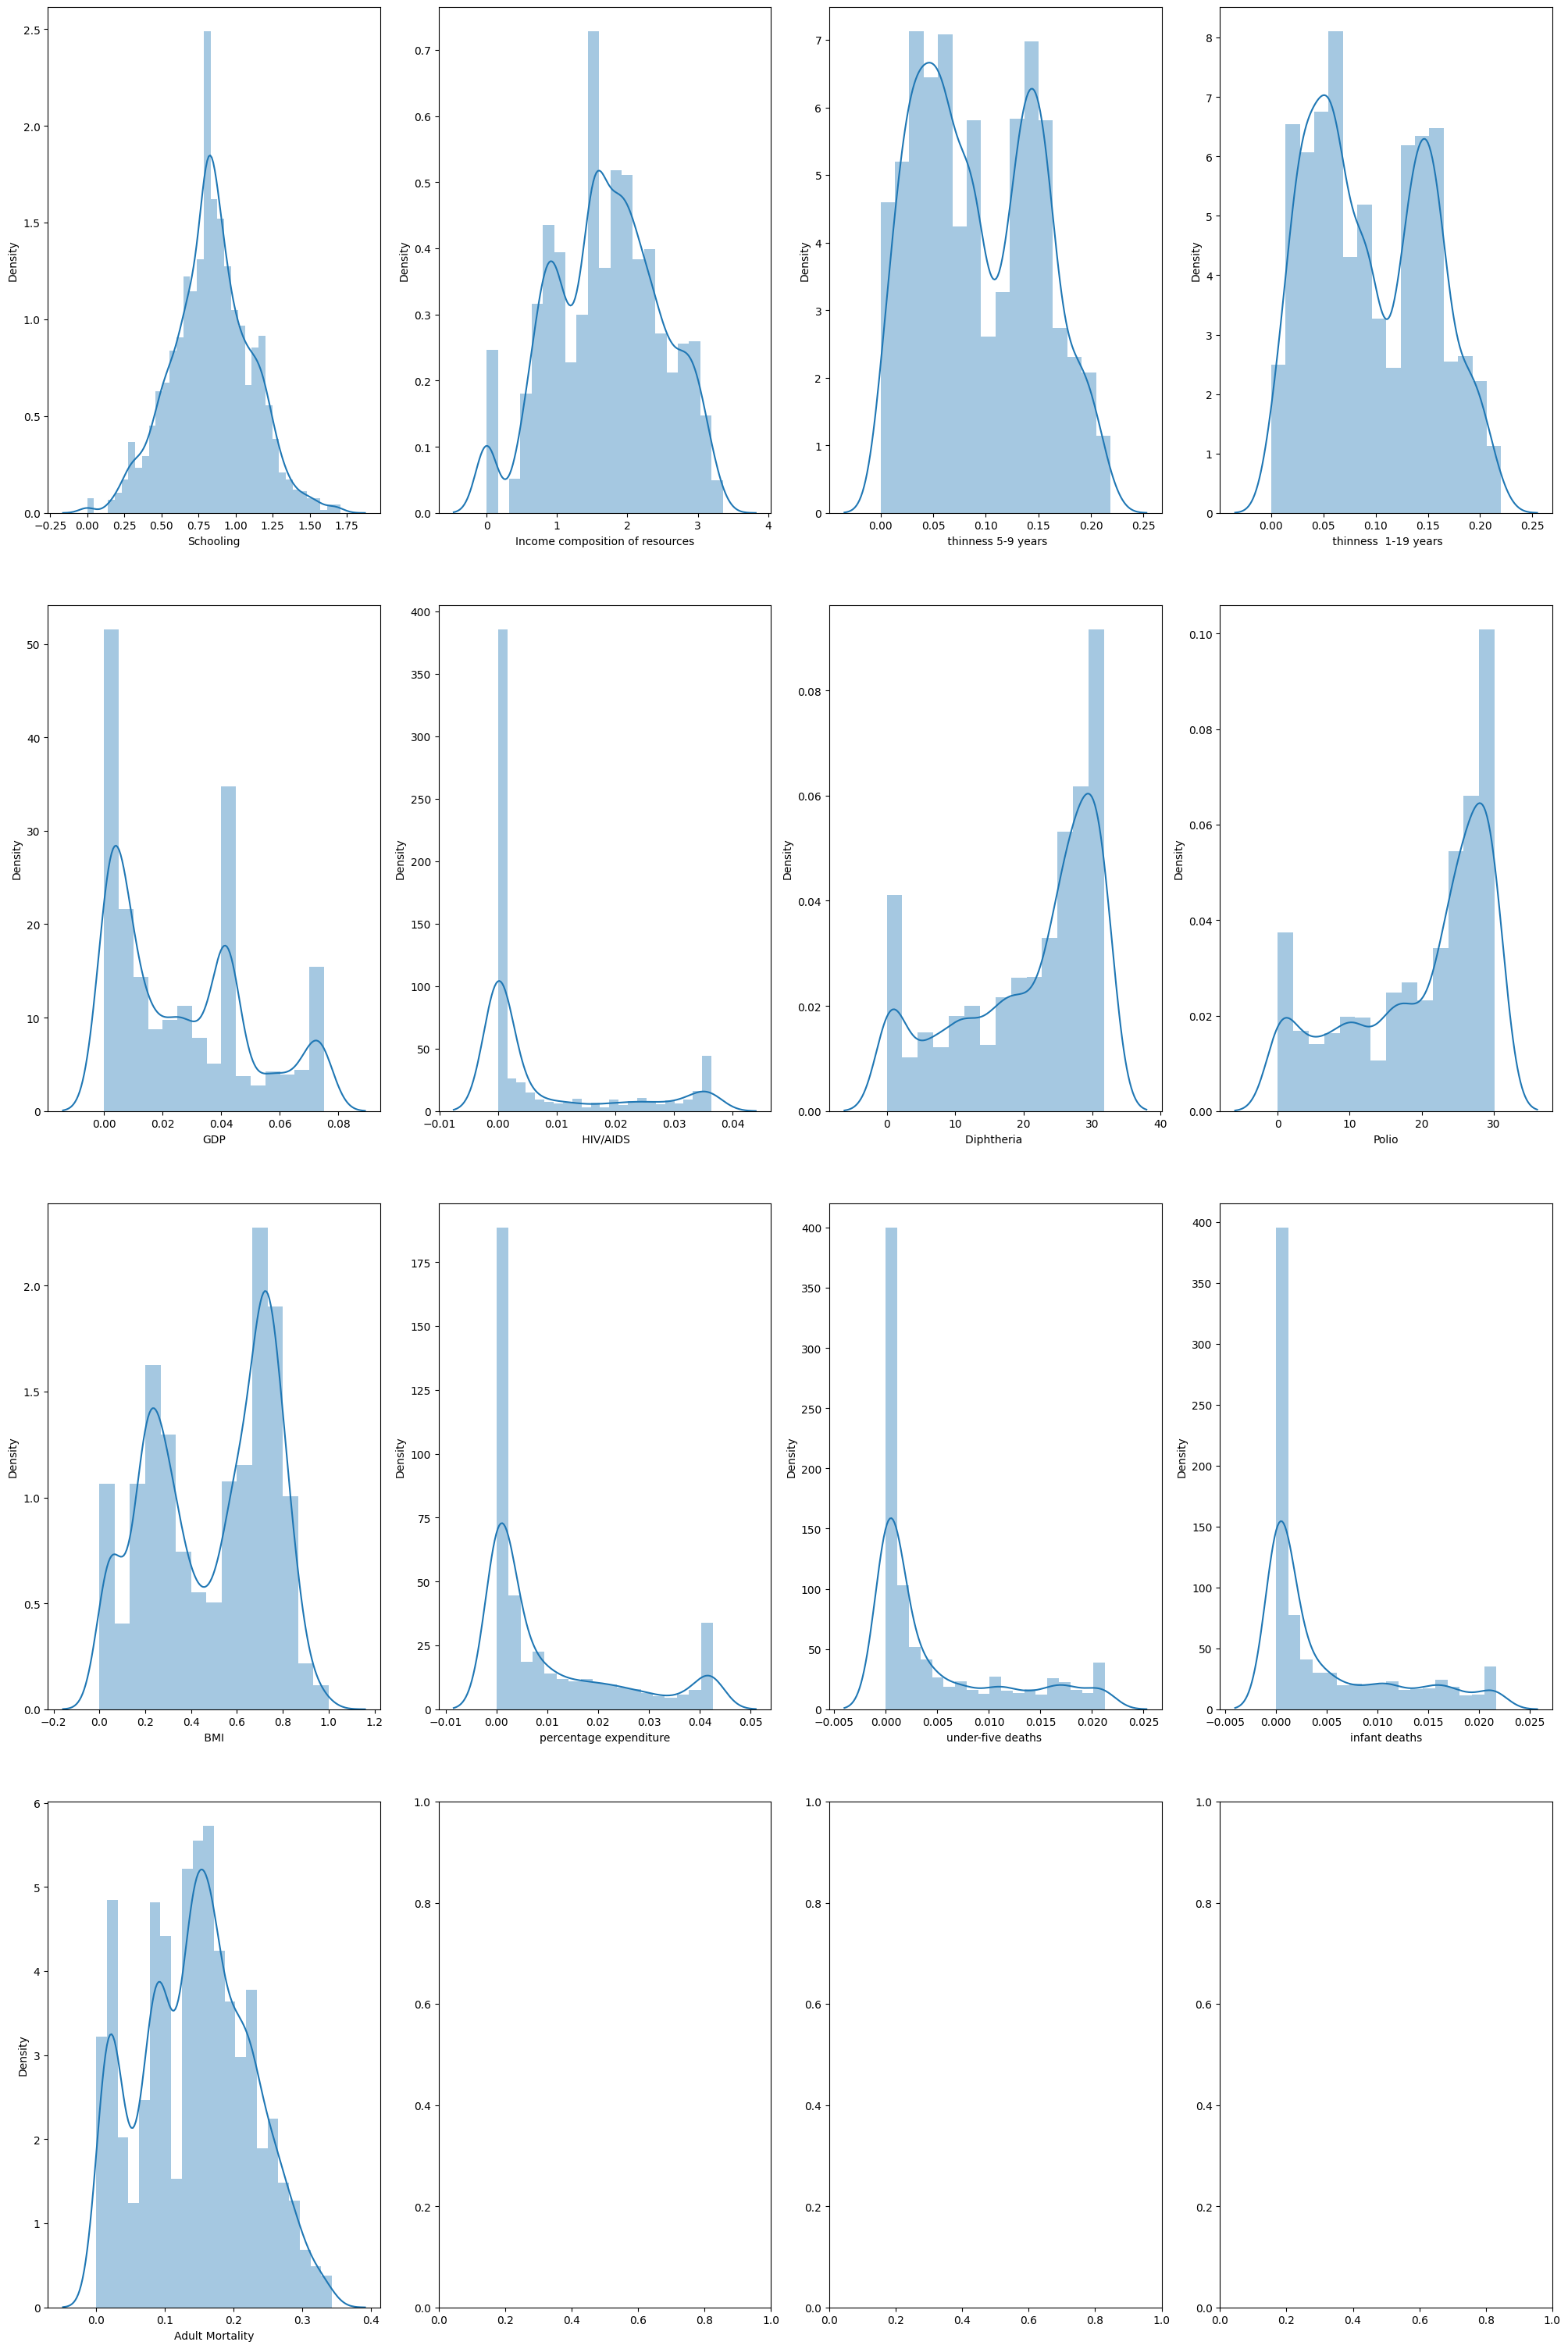

In [70]:
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(20, 30))
index = 0
axs = axs.flatten()
for k,v in x_scaled.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [71]:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# kf = KFold(n_splits=10)
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)

In [72]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)

In [73]:
x_scaled.shape

(2888, 13)

In [74]:
y_scaled.shape

(2888, 1)

In [75]:
tree_reg = DecisionTreeRegressor(max_depth=3)

In [76]:
# fit the model to the training data
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [77]:
y_pred = tree_reg.predict(X_test)

In [91]:
# calculate the mean squared error on the testing data
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.10f}")

Mean Squared Error: 0.0007522538


In [92]:
data_original =min_max_scaler_target.inverse_transform(tree_reg.predict(data_baru2).reshape(1, -1))

c:\Users\Dell\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [93]:
data_original

array([[52.07742069]])

In [80]:
link  = '../../DATASET/Life Expectancy Data.csv'
dle = pd.read_csv(link)


In [81]:
dle.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [85]:
first_row = dle.iloc[0:1,:]
pd.set_option('display.max_columns', None) 
print(first_row)

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0             62     0.01               71.279624         65.0      1154   

    BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
0   19.1                  83    6.0               8.16         65.0   

    HIV/AIDS        GDP  Population   thinness  1-19 years  \
0        0.1  584.25921  33736494.0                   17.2   

    thinness 5-9 years  Income composition of resources  Schooling  
0                 17.3                            0.479       10.1  


In [79]:
print(column_sels)

['Schooling', 'Income composition of resources', ' thinness 5-9 years', ' thinness  1-19 years', 'GDP', ' HIV/AIDS', 'Diphtheria ', 'Polio', ' BMI ', 'percentage expenditure', 'under-five deaths ', 'infant deaths', 'Adult Mortality']


In [86]:
data_baru = [['10.1','0.479','17.3','17.2','584.25921','0.1','65','6','19.1','71.279624','83','62','263']]

In [87]:
data_baru2 = min_max_scaler.transform(data_baru)

c:\Users\Dell\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [88]:
print(data_baru2)

[[0.48792271 0.50527426 0.60350877 0.61956522 0.00488859 0.
  0.64948454 0.03125    0.23629243 0.00365913 0.0332     0.03444444
  0.36288089]]


In [95]:
print(y.head())

0    4.189655
1    4.109233
2    4.109233
3    4.102643
4    4.097672
Name: Life expectancy , dtype: float64


Berikut adalah beberapa contoh model yang sensitif terhadap skewness:<br>

1. Regresi Linier
Regresi linier mengasumsikan bahwa hubungan antara variabel independen dan dependen adalah linier, serta bahwa residual (kesalahan) terdistribusi normal. Jika data sangat skewed, asumsi ini mungkin tidak terpenuhi, yang dapat mempengaruhi hasil dan interpretasi model.<br>

2. Model Klasifikasi seperti Logistic Regression
Seperti regresi linier, logistic regression juga memerlukan asumsi tentang distribusi data. Jika fitur memiliki skewness yang tinggi, model ini mungkin tidak memberikan probabilitas prediksi yang akurat.<br>

3. Support Vector Machines (SVM)
SVM mengandalkan jarak antar titik data untuk membangun margin antara kelas. Data yang sangat skewed dapat mempengaruhi penempatan hyperplane, sehingga mengurangi akurasi prediksi.<br>

4. K-Nearest Neighbors (KNN)
KNN menghitung jarak antara titik data untuk melakukan klasifikasi. Jika fitur memiliki skewness, titik data yang lebih jauh (outlier) dapat memberikan pengaruh yang lebih besar pada hasil prediksi.<br>

5. Naive Bayes
Model ini mengasumsikan bahwa fitur bersifat independen dan terdistribusi normal (dalam kasus Gaussian Naive Bayes). Jika data sangat skewed, asumsi ini tidak terpenuhi, yang dapat mengurangi akurasi model.<br>

Mengatasi Sensitivitas Terhadap Skewness
Untuk model-model tersebut, Anda bisa:<br>

Menerapkan transformasi pada fitur yang skewed (misalnya, log, akar kuadrat, atau Box-Cox).
Mempertimbangkan penggunaan model yang lebih robust terhadap skewness, seperti decision tree atau ensemble methods.
Memahami sensitivitas model terhadap skewness sangat penting untuk memilih pendekatan analisis yang tepat.<br>